In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [14]:
SCALE_FACTOR = 8
def upscale_image(img, scale):
    h, w = img.shape[:2]
    return cv2.resize(img, (w * scale, h * scale), interpolation=cv2.INTER_NEAREST)

def apply_preprocessing(img):

    normalized = (img / 255.0 * 255).astype(np.uint8)

    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(4, 4))
    contrast = cv2.merge([clahe.apply(l), a, b])
    contrast = cv2.cvtColor(contrast, cv2.COLOR_LAB2RGB)
    
    denoised = cv2.GaussianBlur(img, (5, 5), 0)

    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    sharpened = np.clip(cv2.filter2D(img, -1, kernel), 0, 255).astype(np.uint8)

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
    
    return normalized, contrast, denoised, sharpened, gray_rgb


Processing: AUTOMOBILE


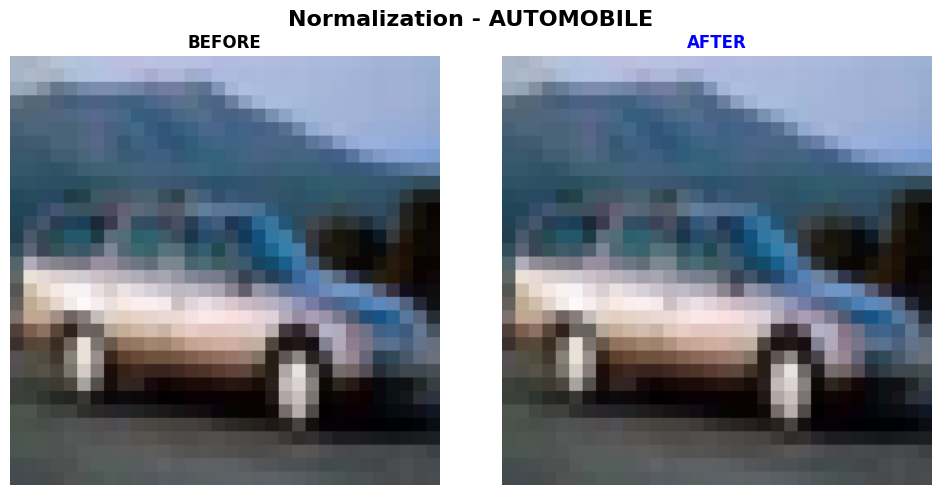

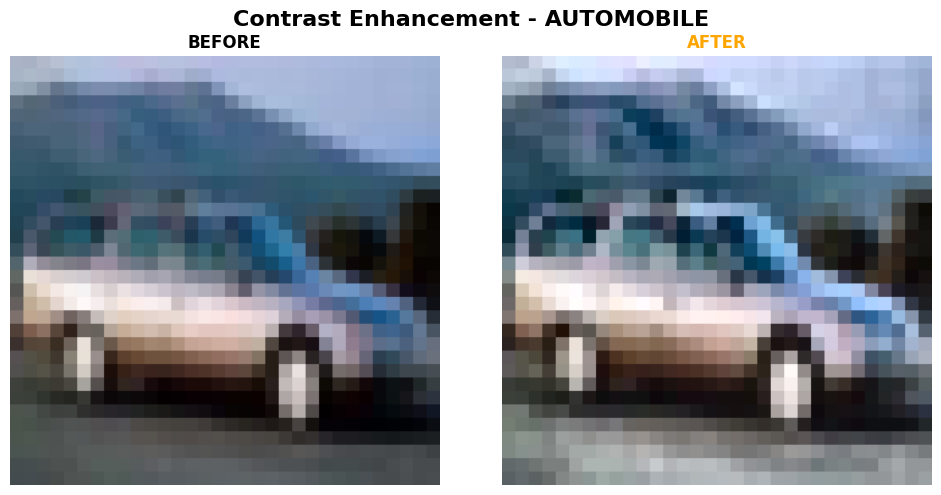

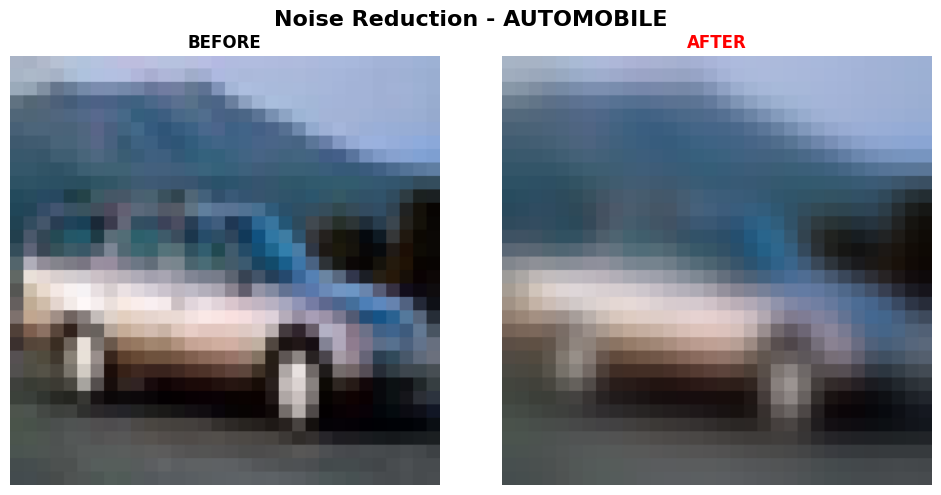

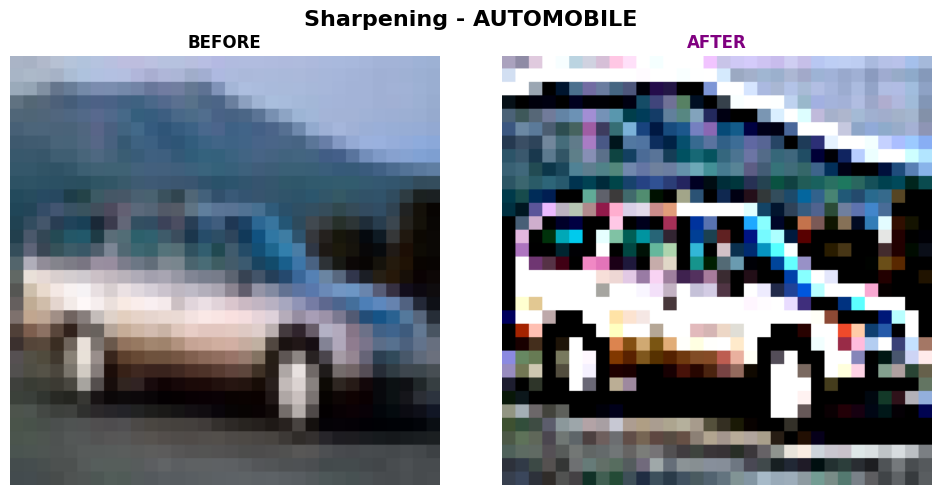

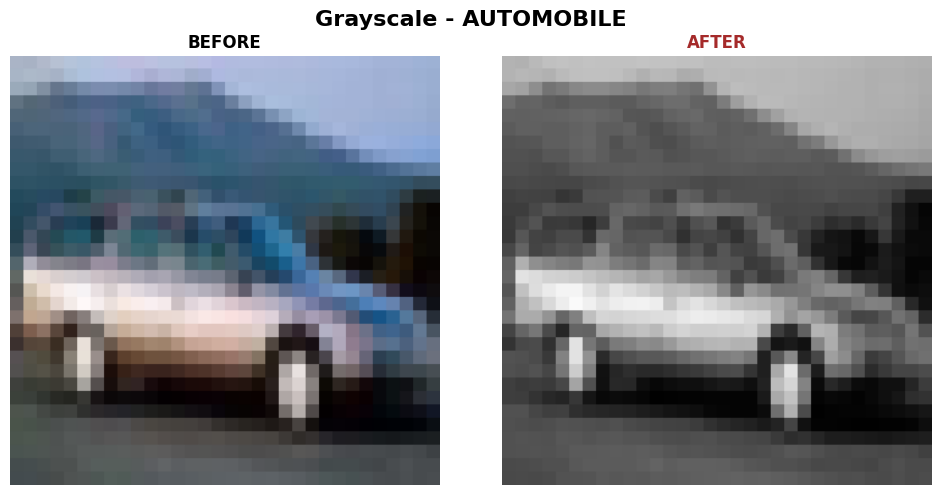

In [15]:
labels_df = pd.read_csv('trainLabels.csv')
sample = labels_df[labels_df['label'] == 'automobile'].head(1).iloc[0]
img_path = f"train/{sample['id']}.png"

original = cv2.imread(img_path)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
label = sample['label']

print(f"Processing: {label.upper()}")

processed = apply_preprocessing(original)
techniques = [
    ('Normalization', 'blue'),
    ('Contrast Enhancement', 'orange'),
    ('Noise Reduction', 'red'),
    ('Sharpening', 'purple'),
    ('Grayscale', 'brown')
]

for idx, (name, color) in enumerate(techniques):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f'{name} - {label.upper()}', fontsize=16, fontweight='bold')
#before
    ax1.imshow(upscale_image(original, SCALE_FACTOR))
    ax1.set_title('BEFORE', fontsize=12, fontweight='bold')
    ax1.axis('off')
    
#after
    ax2.imshow(upscale_image(processed[idx], SCALE_FACTOR))
    ax2.set_title('AFTER', fontsize=12, fontweight='bold', color=color)
    ax2.axis('off')
    
    plt.tight_layout()
    plt.savefig(f"{label}_{name.lower().replace(' ', '_')}.png", dpi=300, bbox_inches='tight')
    plt.show()
